In [5]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [6]:
from blackbox_wrapper import BlackboxWrapper
import keras
from datasets import build_ecg200
from variational_autoencoder import load_model
from lore_wrapper import LoreWrapper
from neighborhood_generators import NeighborhoodGenerator
from utils import choose_z
from joblib import load
from lasts import load_multiple_lasts
import time
import numpy as np
from experiments_neighborhoods_surrogates import multiple_tests
from sbgdt import Sbgdt
from saxdt import Saxdt

In [3]:
random_state = 0
np.random.seed(random_state)
dataset_name = "ecg200"
blackbox_name = "resnet"

file_path = parentdir + "/saved/" + dataset_name + "_" + blackbox_name + "_" + time.strftime("%Y%m%d_%H%M%S")

(X_train, y_train, X_val, y_val,
 X_test, y_test, X_exp_train, y_exp_train,
 X_exp_val, y_exp_val, X_exp_test, y_exp_test) = build_ecg200(
    path=parentdir + "/datasets/ECG200/",
    random_state = random_state
)

knn = load(parentdir + "/trained_models/ecg200/ecg200_knn.joblib")
resnet = keras.models.load_model(parentdir + "/trained_models/ecg200/ecg200_resnet.h5")

_, _, autoencoder = load_model(parentdir + "/trained_models/ecg200/ecg200_vae")

blackbox = BlackboxWrapper(knn, 2, 1)
blackbox = BlackboxWrapper(resnet, 3, 2)
encoder = autoencoder.layers[2]
decoder = autoencoder.layers[3]

DATASET INFO:
X SHAPE:  (100, 96, 1)
y SHAPE:  (100,)

CLASSES BALANCE
0 :  0.31
1 :  0.69

SHAPES:
BLACKBOX TRAINING SET:  (80, 96, 1)
BLACKBOX VALIDATION SET:  (20, 96, 1)
BLACKBOX TEST SET:  (100, 96, 1)
EXPLANATION TRAINING SET:  (80, 96, 1)
EXPLANATION VALIDATION SET:  (20, 96, 1)
EXPLANATION TEST SET:  (100, 96, 1)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
neighborhood_names = ["gaussian_matched", "uniform_sphere", "gaussian", "matched_uniform", "lore"]
neighborhood_list = [NeighborhoodGenerator, NeighborhoodGenerator, NeighborhoodGenerator, NeighborhoodGenerator, LoreWrapper]
neighborhood_kwargs_list = [
        {
            "n": 500,
            "n_search": 10000,
            "threshold": 2,
            "kind": "gaussian_matched",
            "sampling_kind": "gaussian_matched",
            "verbose": False,
            "redo_search": True,
            "forced_balance_ratio": 0.5,
            "cut_radius": False
        },
        {
            "n": 500,
            "n_search": 10000,
            "threshold": 2,
            "kind": "uniform_sphere",
            "sampling_kind": "uniform_sphere",
            "verbose": False,
            "redo_search": True,
            "forced_balance_ratio": 0.5,
            "cut_radius": True
        },
        {
            "n": 500,
            "n_search": 10000,
            "threshold": 2,
            "kind": "gaussian",
            "sampling_kind": "gaussian",
            "verbose": False,
            "redo_search": True,
            "forced_balance_ratio": 0.5,
            "cut_radius": False
        },
        {
            "n": 500,
            "n_search": 10000,
            "threshold": 2,
            "kind": "gaussian_matched",
            "sampling_kind": "uniform_sphere",
            "verbose": False,
            "redo_search": True,
            "forced_balance_ratio": 0.5,
            "cut_radius": True
        },
        {"verbose": False, "samples": 500, "ngen": 10}
    ]

In [12]:
from sbgdt import generate_n_shapelets_per_size
n_shapelets_per_size = generate_n_shapelets_per_size(X_train.shape[1], n_shapelets_per_length=2, 
                                                     min_length=8, start_divider=2, divider_multiplier=1.2)
surrogate_kwargs_list = [{"shapelet_model_params": {"max_iter": 50, "n_shapelets_per_size":n_shapelets_per_size}, 
                          "random_state": random_state},
                             {"random_state": np.random.seed(0), "create_plotting_dictionaries":False}]

surrogate_list = [Sbgdt, Saxdt]
surrogate_names = ["stdt", "saxdt"]


--- MULTIPLE LASTS TESTS ---

 --> RECONSTRUCTION ACCURACY: 1.0


--- NEIGHBORHOOD GENERATIONS ---

 --> UNIFORM_SPHERE
  NEIGHGEN: 1 / 1 | INSTANCE: 1 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 2 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 3 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 4 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 5 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 6 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 7 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 8 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 9 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 10 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 11 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 12 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 13 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 14 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 15 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 16 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 17 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 18 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 19 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 20 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 21 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 22 / 100
  NEIGHGEN: 1 / 1 | INSTANCE: 2

  INSTANCE: 98 / 100
  INSTANCE: 99 / 100
  INSTANCE: 100 / 100

--- METRICS ---


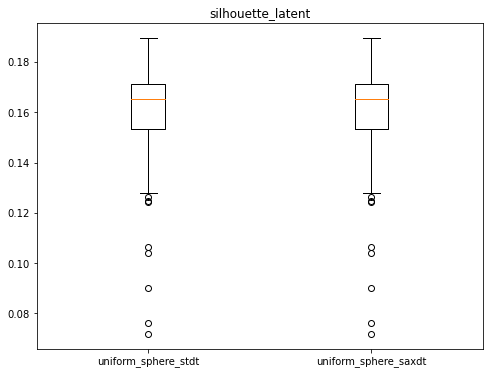

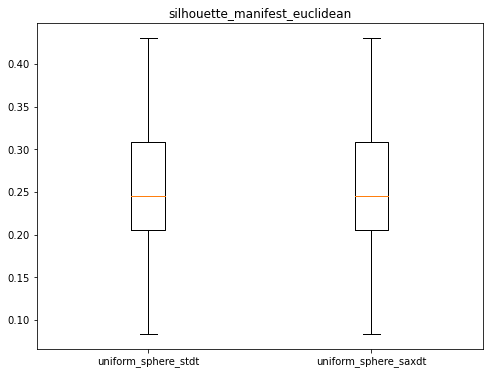

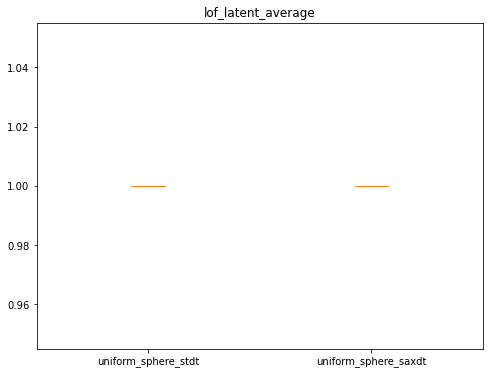

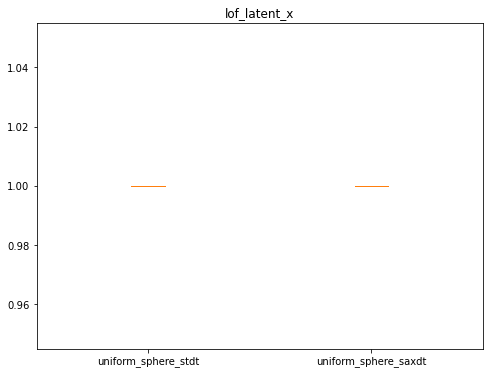

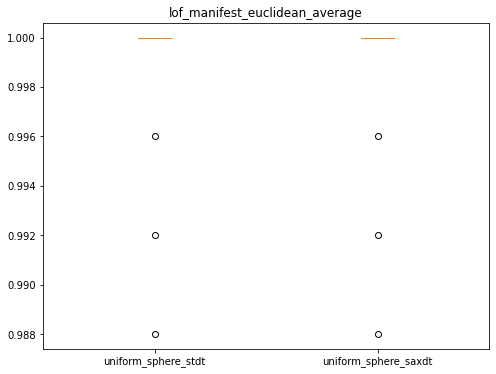

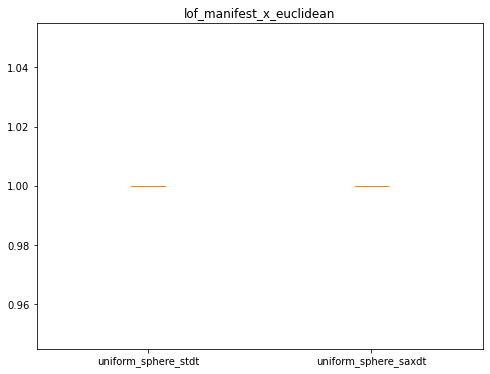

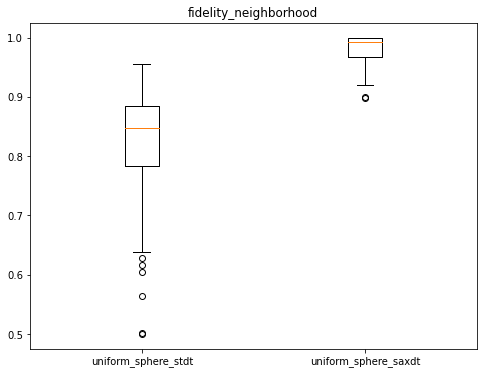

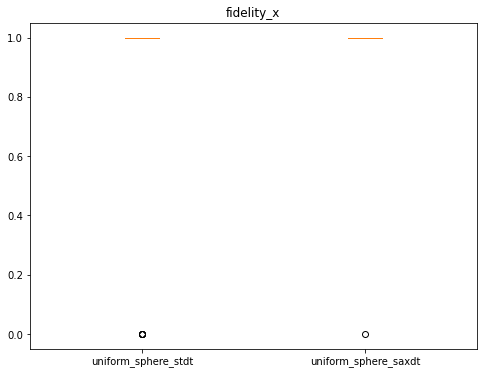

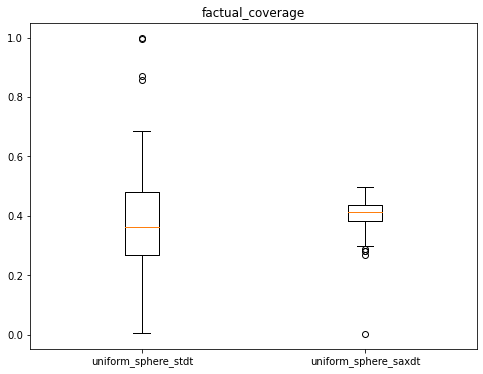

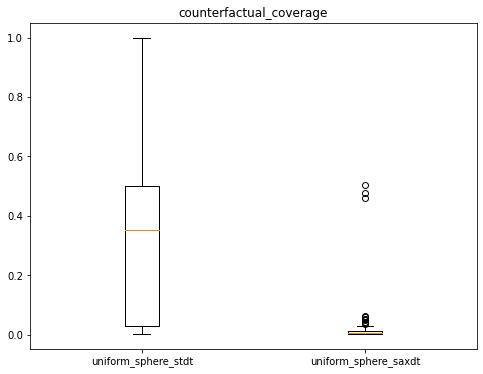

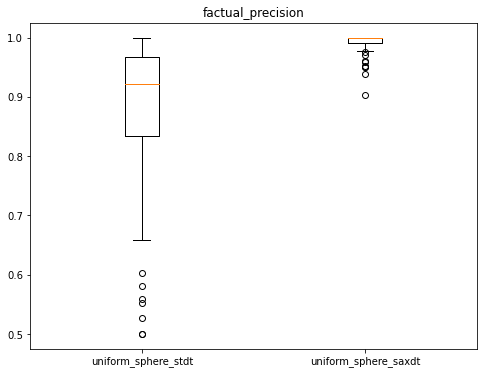

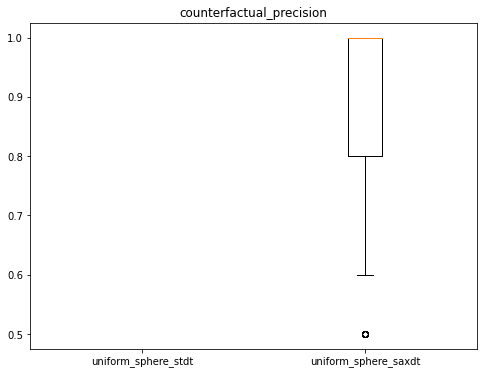

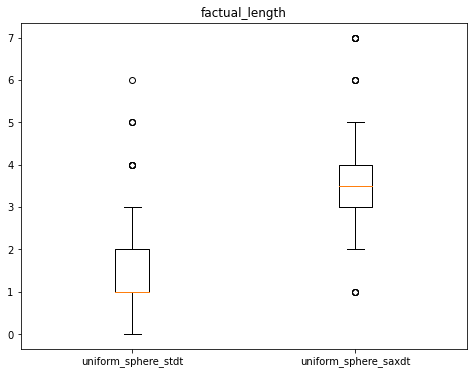

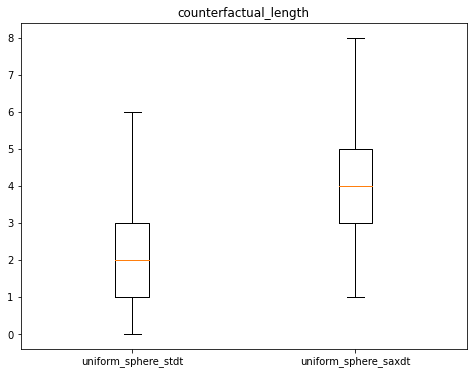

                      counterfactual_coverage  counterfactual_length  \
uniform_sphere_stdt                   0.30544                   2.30   
uniform_sphere_saxdt                  0.02480                   4.12   

                      counterfactual_precision  factual_coverage  \
uniform_sphere_stdt                   0.841738           0.38414   
uniform_sphere_saxdt                  0.884913           0.40062   

                      factual_length  factual_precision  \
uniform_sphere_stdt             1.74           0.878475   
uniform_sphere_saxdt            3.55           0.992414   

                      fidelity_neighborhood  fidelity_x  lof_latent_average  \
uniform_sphere_stdt                 0.82084        0.95                 1.0   
uniform_sphere_saxdt                0.98056        0.99                 1.0   

                      lof_latent_x  lof_manifest_euclidean_average  \
uniform_sphere_stdt            1.0                         0.99976   
uniform_sphere_saxdt  

In [14]:
%%time
out = multiple_tests(
        X_exp_test,
        blackbox,
        encoder,
        decoder,
        neighborhood_list=neighborhood_list,
        neighborhood_kwargs_list=neighborhood_kwargs_list,
        neighborhood_names=neighborhood_names,
        surrogate_list=surrogate_list,
        surrogate_kwargs_list=surrogate_kwargs_list,
        surrogate_names=surrogate_names,
        file_path=file_path,
        random_state=random_state,
        n_instances_to_explain=None,
        verbose=True,
        simple_dump=[False, True],
        boxplots=True
    )